In [8]:
library("tidyverse")
library("ggthemr"); ggthemr("fresh")

Warning message:
“New theme missing the following elements: panel.grid, plot.tag, plot.tag.position”

In [9]:
regr_preds = read_csv("../../data//output/assembled_predictions_mos_tot_num_mosquitos_mosquitos.csv")

Parsed with column specification:
cols(
  t_date = col_date(format = ""),
  loc_lat = col_double(),
  loc_lng = col_double(),
  trap_trap_name = col_character(),
  mos_tot_num_mosquitos = col_integer(),
  ridgepreds = col_double(),
  neuralnetpreds = col_double(),
  rf_preds = col_double(),
  lstm_preds = col_double(),
  constant = col_integer(),
  assembledpreds = col_double()
)


In [10]:
head(regr_preds)

t_date,loc_lat,loc_lng,trap_trap_name,mos_tot_num_mosquitos,ridgepreds,neuralnetpreds,rf_preds,lstm_preds,constant,assembledpreds
2014-06-05,41.95630,-87.79752,T002,84,19.585841,5.423223,21.52009,1.947383,1,24.05181
2014-06-05,42.00800,-87.77823,T008,9,11.410413,4.438284,19.14529,2.024186,1,21.42721
2014-06-05,41.98859,-87.85447,T009,82,20.044084,4.783242,21.62731,2.370181,1,24.10098
2014-06-05,41.99356,-87.74542,T012,90,9.258737,3.737053,18.32411,2.604612,1,20.41473
2014-06-05,41.92389,-87.77891,T013,46,10.302112,5.252260,18.10449,2.080730,1,20.21034
2014-06-05,41.96201,-87.64685,T017,15,10.057236,4.771661,17.28331,2.378896,1,19.19694


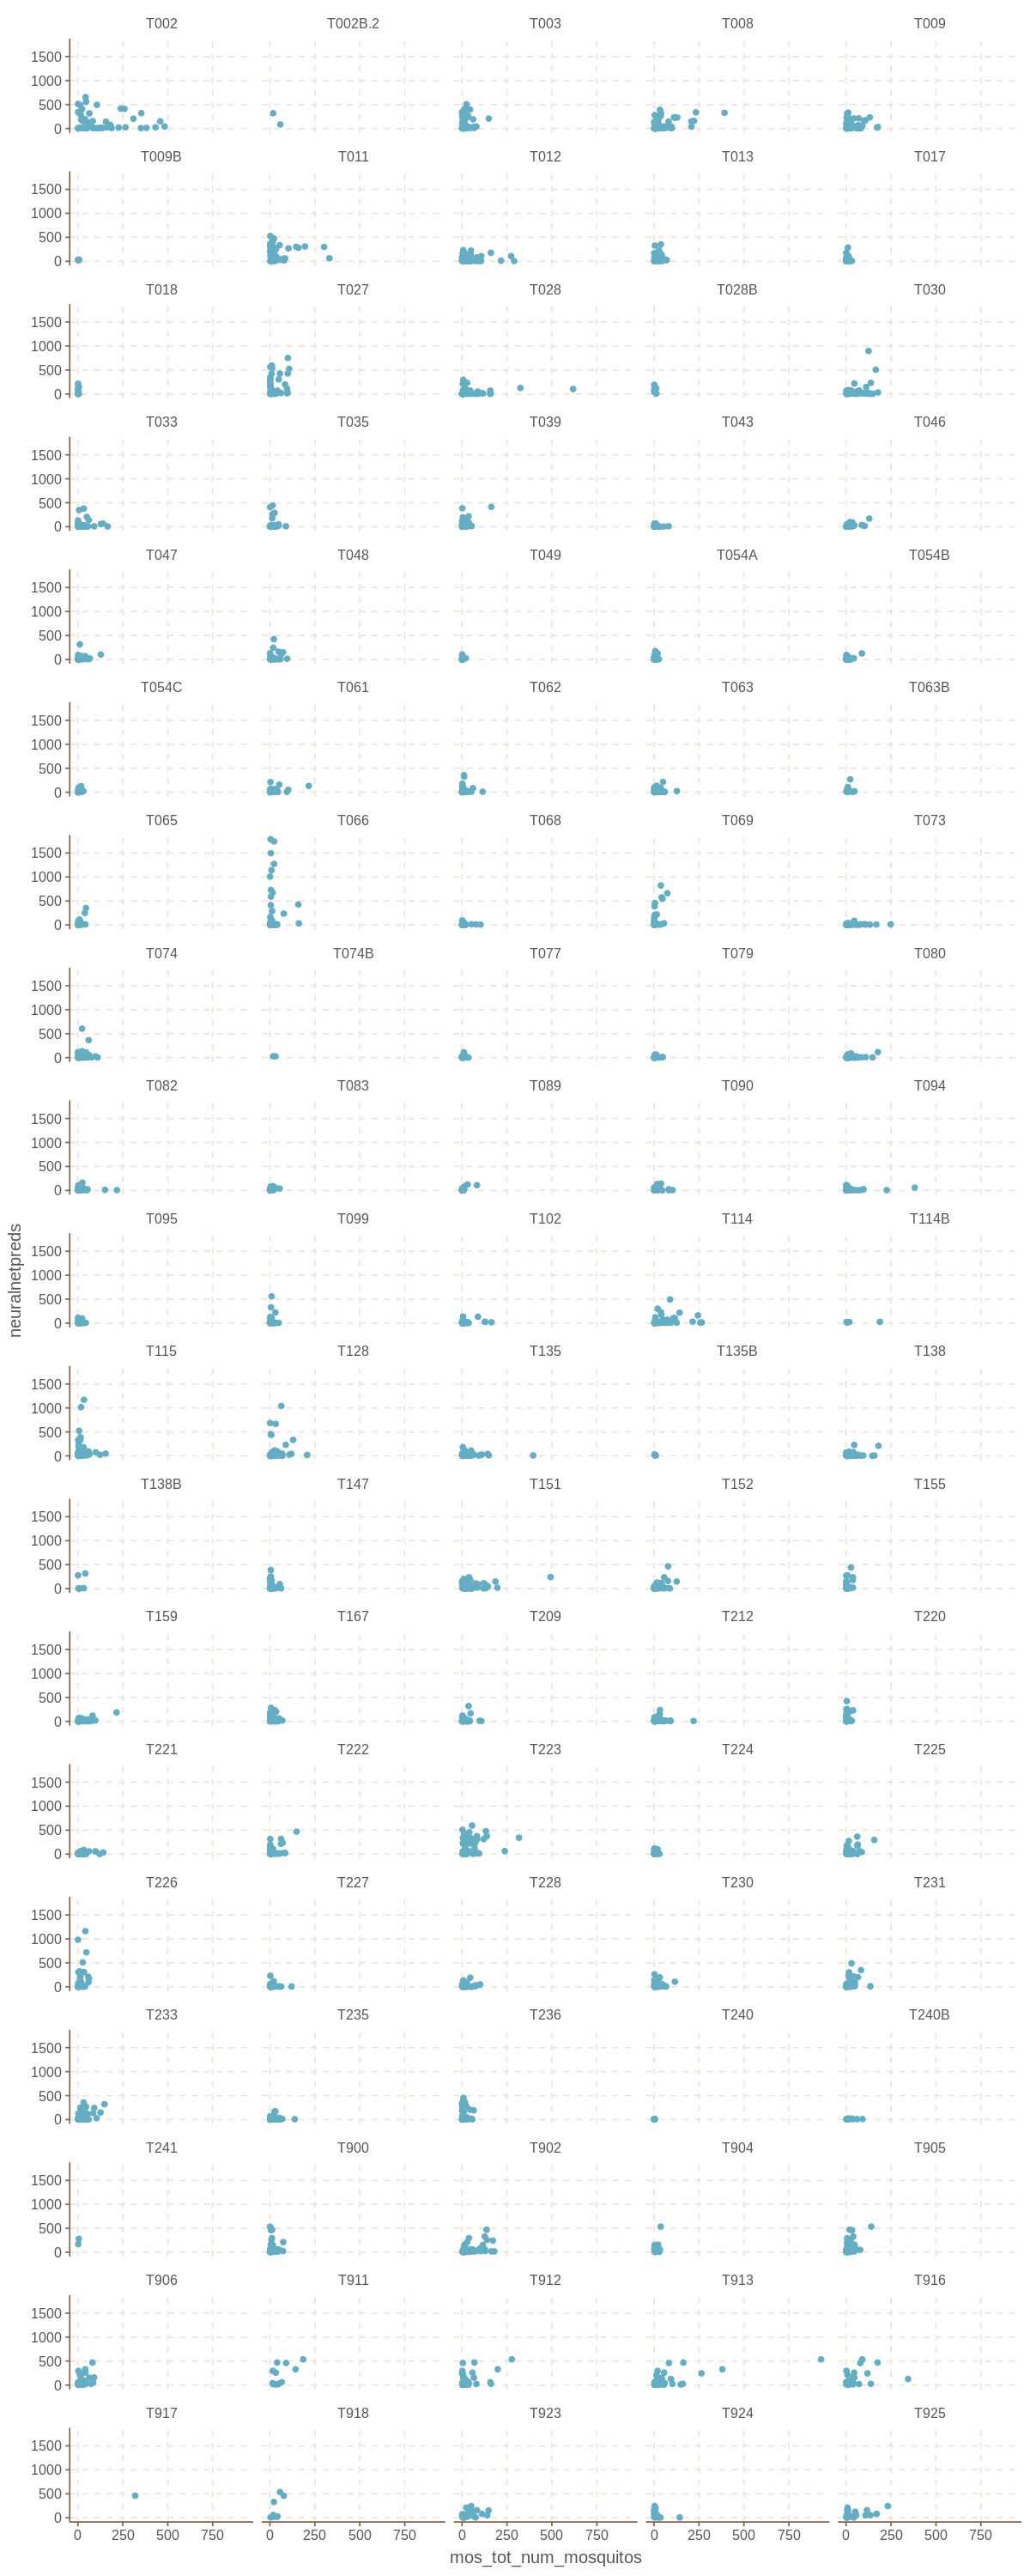

In [46]:
options(repr.plot.width=10, repr.plot.height=25)

regr_preds %>% ggplot(aes(mos_tot_num_mosquitos,neuralnetpreds))+geom_point()+facet_wrap(~trap_trap_name,ncol = 5)

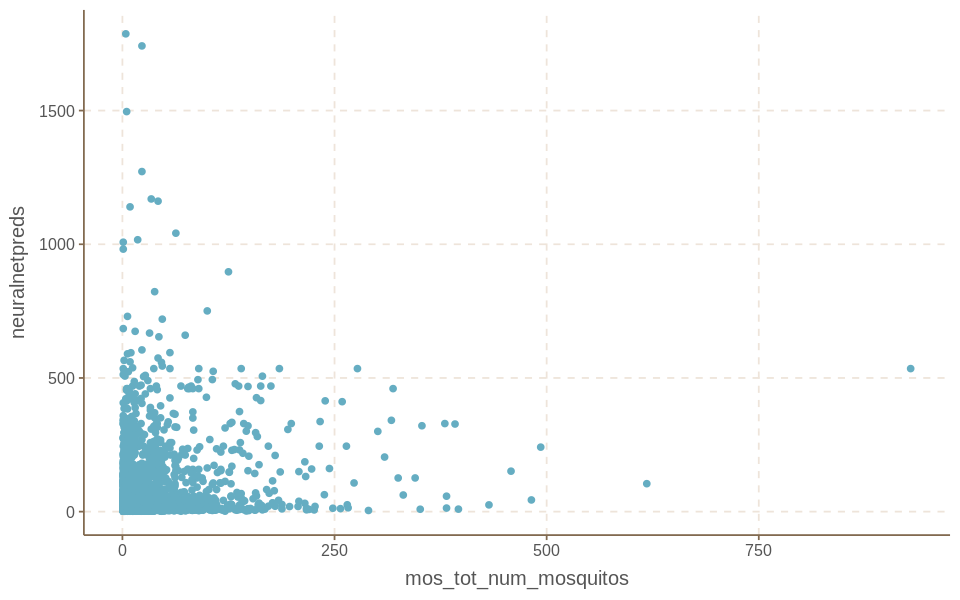

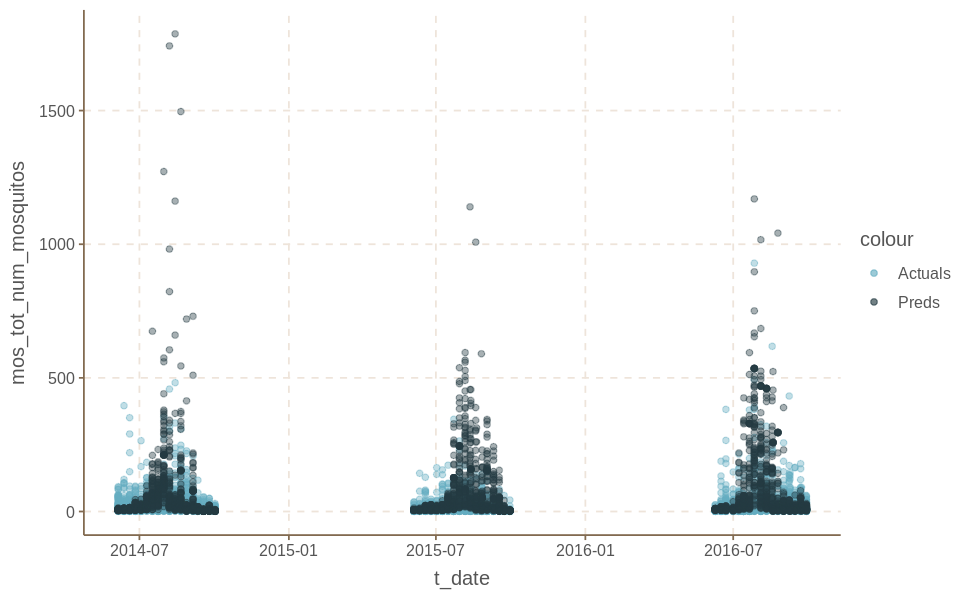

In [50]:
options(repr.plot.width=8, repr.plot.height=5)

regr_preds %>% ggplot(aes(mos_tot_num_mosquitos,neuralnetpreds))+
    geom_point()

regr_preds %>% ggplot(aes(t_date))+
    geom_point(aes(y=mos_tot_num_mosquitos,color="Actuals"),alpha=0.4)+
    geom_point(aes(y=neuralnetpreds,color="Preds"),alpha=0.4)

In [19]:
summary(regr_preds$t_date)

Min.      1st Qu.       Median         Mean      3rd Qu.         Max. 
"2014-06-05" "2014-08-21" "2015-07-23" "2015-07-13" "2016-07-08" "2016-09-29"

In [51]:
mos_ts = xts::xts(x = regr_preds[,c("neuralnetpreds","mos_tot_num_mosquitos")], order.by = regr_preds$t_date)

In [52]:
library(xts)

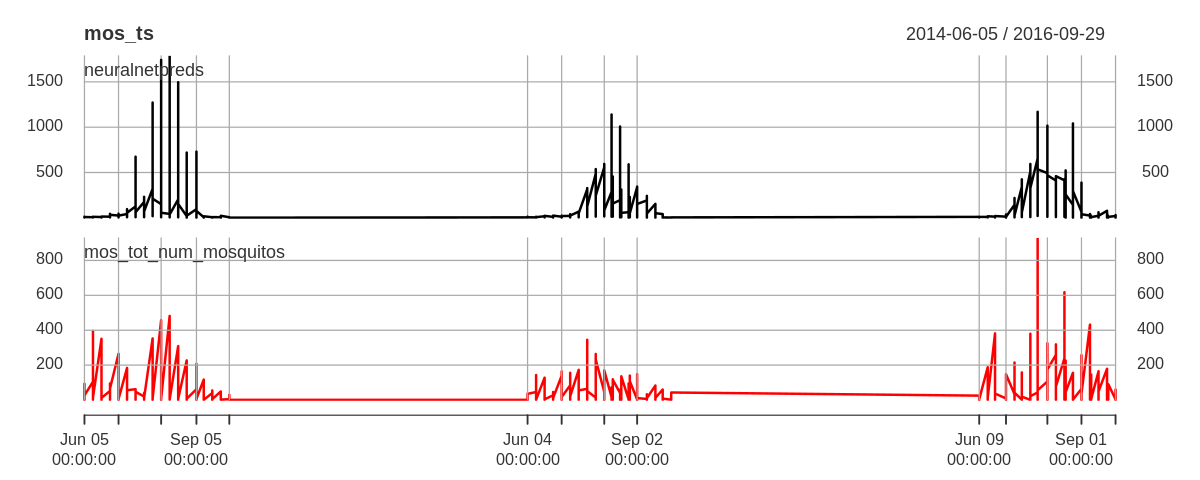

In [53]:
options(repr.plot.width=10, repr.plot.height=4)
plot(mos_ts, multi.panel = T, yaxis.same = F)